#  Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle
import pickle

In [2]:
print("NOTEBOOK 05: TRAIN-TEST SPLIT AND DATA PREPARATION")

NOTEBOOK 05: TRAIN-TEST SPLIT AND DATA PREPARATION


In [3]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

# Load Engineered Dataset

In [4]:
df=pd.read_csv("../data/processed/crop_data_engineered.csv")

In [5]:
print(f"Shape: {df.shape}")
print(f"Features: {df.shape[1] - 1}") 
print(f"Samples: {df.shape[0]}")

print(f"\n Columns ({len(df.columns)}):")
print(df.columns.tolist())

print("\n First 5 rows:")
print(df.head())

Shape: (2200, 40)
Features: 39
Samples: 2200

 Columns (40):
['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'N_to_P_ratio', 'N_to_K_ratio', 'P_to_K_ratio', 'NPK_sum', 'NPK_product', 'N_dominance', 'P_dominance', 'K_dominance', 'temp_humidity_interaction', 'climate_index', 'heat_stress_index', 'ph_squared', 'ph_deviation', 'N_ph_interaction', 'P_ph_interaction', 'K_ph_interaction', 'water_stress_index', 'moisture_index', 'rainfall_per_temp', 'water_availability', 'growing_condition_index', 'resource_availability', 'environmental_stress', 'nutrient_balance', 'temp_category_Hot', 'temp_category_Moderate', 'humidity_category_Low', 'humidity_category_Medium', 'ph_category_Alkaline', 'ph_category_Neutral', 'rainfall_category_Low', 'rainfall_category_Medium']

 First 5 rows:
    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537 

Check data quality

In [6]:
print(f"\nDATA QUALITY CHECK:")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")


DATA QUALITY CHECK:
Missing values: 0
Duplicate rows: 0
Memory usage: 670.73 KB


# Separate Features and Target

In [7]:
target_col="label"

In [8]:
X=df.drop(columns=[target_col])
y=df[target_col]

In [9]:
print("Separation Completed.")
print("Features (X)")
print(f"Shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Data type:{X.dtypes.value_counts().to_dict()}")

Separation Completed.
Features (X)
Shape: (2200, 39)
Number of features: 39
Data type:{dtype('float64'): 26, dtype('bool'): 8, dtype('int64'): 5}


In [10]:
print("TARGET (y):")
print(f"Shape: {y.shape}")
print(f"Data type: {y.dtype}")
print(f"Unique classes: {y.nunique()}")
print(f"Classes: {sorted(y.unique())}")

TARGET (y):
Shape: (2200,)
Data type: object
Unique classes: 22
Classes: ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


Check class distribution

In [11]:
class_dist=y.value_counts().sort_index()
print(class_dist)

label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
Name: count, dtype: int64


Visualize class distribution


Saved: 20_target_distribution.png


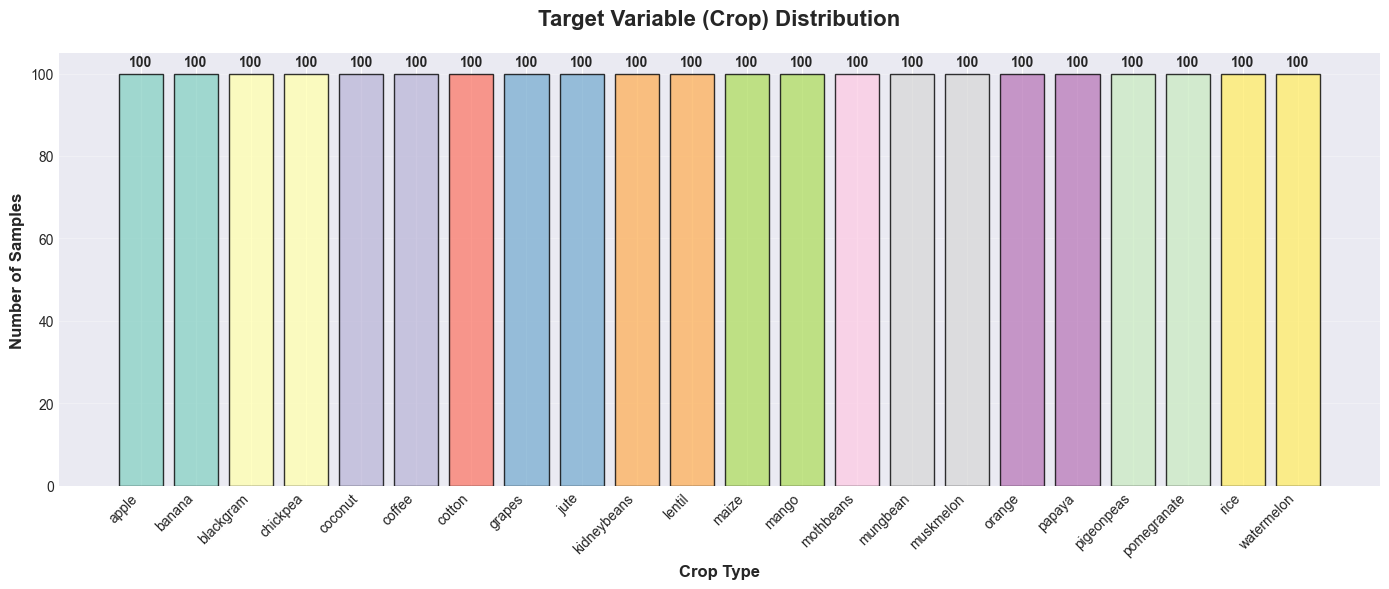

In [12]:
plt.figure(figsize=(14,6))
colors=plt.cm.Set3(np.linspace(0,1,len(class_dist)))
bars=plt.bar(class_dist.index,class_dist.values,color=colors,edgecolor='black',alpha=0.8)

plt.title("Target Variable (Crop) Distribution",fontsize=16,fontweight="bold",pad=20)
plt.xlabel("Crop Type",fontsize=12,fontweight="bold")
plt.ylabel("Number of Samples",fontsize=12,fontweight="bold")
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',alpha=0.3)

for i,(crop,count) in enumerate(class_dist.items()):
    plt.text(i,count+1,str(count),ha="center",va="bottom",fontweight="bold")

plt.tight_layout()
plt.savefig('../data/visualizations/20_target_distribution.png', dpi=300, bbox_inches='tight')
print("\nSaved: 20_target_distribution.png")
plt.show()

# Encode Target Variable

In [13]:
print("ENCODING TARGET VARIABLE (LABEL ENCODING)")

ENCODING TARGET VARIABLE (LABEL ENCODING)


In [14]:
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)

In [15]:
print("Encoding Mapping")
print(f"Original Label (strings): {len(label_encoder.classes_)}")
print(f"Encoded labels (intgers): 0 to {len(label_encoder.classes_)-1}")

Encoding Mapping
Original Label (strings): 22
Encoded labels (intgers): 0 to 21


Create mapping dictionary

In [16]:
label_mapping={label:idx for idx,label in enumerate(label_encoder.classes_)}
print(f"\n Label -> Integer Mapping")
for label,idx in label_mapping.items():
    print(f"{idx:2} -> {label}")


 Label -> Integer Mapping
 0 -> apple
 1 -> banana
 2 -> blackgram
 3 -> chickpea
 4 -> coconut
 5 -> coffee
 6 -> cotton
 7 -> grapes
 8 -> jute
 9 -> kidneybeans
10 -> lentil
11 -> maize
12 -> mango
13 -> mothbeans
14 -> mungbean
15 -> muskmelon
16 -> orange
17 -> papaya
18 -> pigeonpeas
19 -> pomegranate
20 -> rice
21 -> watermelon


Save label encoder for later use

In [17]:
encoder_path="../models/label_encoder.pkl"
import os
os.makedirs("../models",exist_ok=True)

In [18]:
with open(encoder_path,"wb") as f:
    pickle.dump(label_encoder,f)

print(f"\nSaved Label Encoder at: {encoder_path}")


Saved Label Encoder at: ../models/label_encoder.pkl


Saved mapping to CSV for reference

In [19]:
mapping_df=pd.DataFrame({
    "Crop Name": label_encoder.classes_,
    "Encoded Value": range(len(label_encoder.classes_))
})
mapping_df.to_csv('../data/processed/label_encoding_map.csv', index=False)
print("Encoding map saved to: ../data/processed/label_encoding_map.csv")

Encoding map saved to: ../data/processed/label_encoding_map.csv


#  Stratified Train-Test Split

In [20]:
print("PERFORMING STRATIFIED TRAIN-TEST SPLIT")

PERFORMING STRATIFIED TRAIN-TEST SPLIT


In [21]:
test_size=0.2
random_state=42

In [22]:
print("Split Configuration:")
print(f"Test Size: {test_size * 100}%")
print(f"Train Size: {(1 - test_size) * 100}%")
print(f"Random State: {random_state}")
print("Stratification: Yes (maintain class distribution)")

Split Configuration:
Test Size: 20.0%
Train Size: 80.0%
Random State: 42
Stratification: Yes (maintain class distribution)


Perform stratified split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y_encoded,
    test_size=test_size,
    random_state=random_state,
    stratify=y_encoded  
)
print("Split completed successfully.")

Split completed successfully.


In [24]:
print("Split Summary")
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

Split Summary
Total samples: 2200
Training samples: 1760 (80.0%)
Testing samples: 440 (20.0%)


In [25]:
print("TRAINING SET:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

TRAINING SET:
X_train shape: (1760, 39)
y_train shape: (1760,)


In [26]:
print(f"TESTING SET:")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

TESTING SET:
X_test shape: (440, 39)
y_test shape: (440,)


# Verify Stratification

Check class distribution in train and test sets

In [27]:
train_dist=pd.Series(y_train).value_counts().sort_index()
test_dist=pd.Series(y_test).value_counts().sort_index()

Calculate percentages

In [28]:
train_pct=(train_dist/len(y_train)*100).round(2)
test_pct=(test_dist/len(y_test)*100).round(2)

Create comparison dataframe

In [29]:
stratification_check = pd.DataFrame({
    'Class': range(len(label_encoder.classes_)),
    'Crop': label_encoder.classes_,
    'Train_Count': train_dist.values,
    'Train_Pct': train_pct.values,
    'Test_Count': test_dist.values,
    'Test_Pct': test_pct.values
})

In [30]:
print("\nSTRATIFICATION VERIFICATION:")
print(stratification_check)


STRATIFICATION VERIFICATION:
    Class         Crop  Train_Count  Train_Pct  Test_Count  Test_Pct
0       0        apple           80       4.55          20      4.55
1       1       banana           80       4.55          20      4.55
2       2    blackgram           80       4.55          20      4.55
3       3     chickpea           80       4.55          20      4.55
4       4      coconut           80       4.55          20      4.55
5       5       coffee           80       4.55          20      4.55
6       6       cotton           80       4.55          20      4.55
7       7       grapes           80       4.55          20      4.55
8       8         jute           80       4.55          20      4.55
9       9  kidneybeans           80       4.55          20      4.55
10     10       lentil           80       4.55          20      4.55
11     11        maize           80       4.55          20      4.55
12     12        mango           80       4.55          20      4.55
13  

Visualize stratification


Saved: 21_train_test_stratification.png


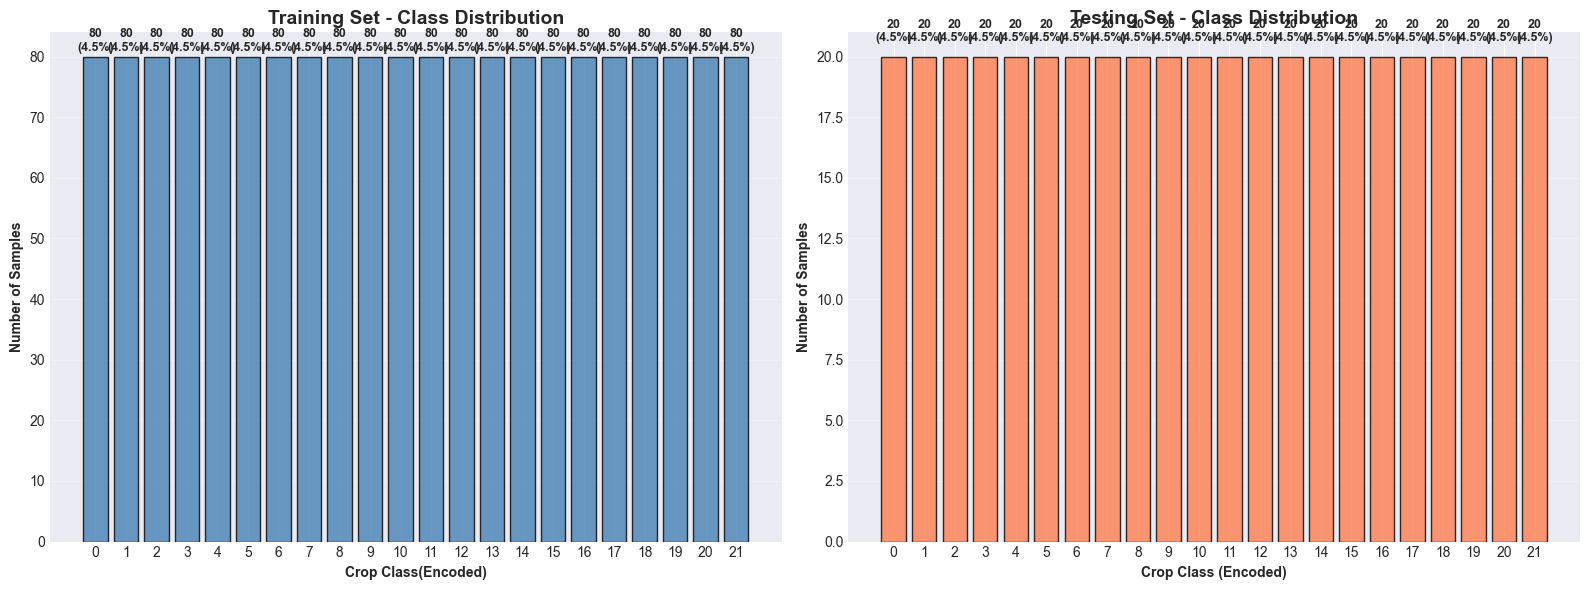

In [31]:
fig,axes=plt.subplots(1,2,figsize=(16,6))

# Training set distribution
axes[0].bar(range(len(train_dist)), train_dist.values, color='steelblue', edgecolor='black', alpha=0.8)
axes[0].set_title('Training Set - Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Crop Class(Encoded)',fontweight='bold')
axes[0].set_ylabel('Number of Samples', fontweight='bold')
axes[0].set_xticks(range(len(label_encoder.classes_)))
axes[0].set_xticklabels(range(len(label_encoder.classes_)))
axes[0].grid(axis='y', alpha=0.3)

# Add percentage labels
for i, count in enumerate(train_dist.values):
    axes[0].text(i, count + 0.5, f'{count}\n({train_pct.values[i]:.1f}%)', 
                 ha='center', va='bottom', fontsize=9,fontweight='bold')

# Testing set distribution
axes[1].bar(range(len(test_dist)), test_dist.values, color='coral', edgecolor='black', alpha=0.8)
axes[1].set_title('Testing Set - Class Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Crop Class (Encoded)',fontweight='bold')
axes[1].set_ylabel('Number of Samples', fontweight='bold')
axes[1].set_xticks(range(len(label_encoder.classes_)))
axes[1].set_xticklabels(range(len(label_encoder.classes_)))
axes[1].grid(axis='y', alpha=0.3)

# Add percentage labels pra
for i, count in enumerate(test_dist.values):
    axes[1].text(i, count + 0.5, f'{count}\n({test_pct.values[i]:.1f}%)', 
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/visualizations/21_train_test_stratification.png', dpi=300, bbox_inches='tight')
print("\nSaved: 21_train_test_stratification.png")
plt.show()

Check if stratification is balanced

In [32]:
max_diff=abs(train_pct - test_pct).max()
print("\nStratification Verification Summary:")

if max_diff<1:
    print(f"Max percentage difference: {max_diff:.2f}%")
    print("Status: EXCELLENT (< '1%' difference)")
elif max_diff<2:
    print(f"Max percentage difference: {max_diff:.2f}%")
    print("Status: GOOD (< '2%' difference)")
else:
    print(f"Max percentage difference: {max_diff:.2f}%")
    print("Status: POOR (>= '2%' difference) - Consider revising split strategy")


Stratification Verification Summary:
Max percentage difference: 0.00%
Status: EXCELLENT (< '1%' difference)


# Feature Scaling - StandardScaler

In [33]:
print("FEATURE SCALING - STANDARD SCALER")

FEATURE SCALING - STANDARD SCALER


In [34]:
print("\nSTANDARD SCALING:")
print("Formula: z = (x - μ) / σ")
print("mew = mean, alpha = standard deviation")
print("Result: Mean = 0, Std Dev = 1")
print("Best for: Algorithms sensitive to feature magnitude")
print("(Logistic Regression, SVM, Neural Networks)")


STANDARD SCALING:
Formula: z = (x - μ) / σ
mew = mean, alpha = standard deviation
Result: Mean = 0, Std Dev = 1
Best for: Algorithms sensitive to feature magnitude
(Logistic Regression, SVM, Neural Networks)


In [35]:
scaler_standard = StandardScaler()

Fit on training data and transform both train and test

In [36]:
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

Convert back to DataFrame for better handling

In [37]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [38]:
print("BEFORE SCALING (Training Set):")
print(f"Mean range: [{X_train.mean().min():.2f}, {X_train.mean().max():.2f}]")
print(f"Std dev range: [{X_train.std().min():.2f}, {X_train.std().max():.2f}]")

BEFORE SCALING (Training Set):
Mean range: [0.08, 133193.96]
Std dev range: [0.13, 201722.98]


In [39]:
print("AFTER SCALING (Training Set):")
print(f"Mean range: [{X_train_scaled_df.mean().min():.6f}, {X_train_scaled_df.mean().max():.6f}]")
print(f"Std dev range: [{X_train_scaled_df.std().min():.2f}, {X_train_scaled_df.std().max():.2f}]")

AFTER SCALING (Training Set):
Mean range: [-0.000000, 0.000000]
Std dev range: [1.00, 1.00]


In [40]:
scaler_standard_path = '../models/scaler_standard.pkl'
with open(scaler_standard_path, 'wb') as f:
    pickle.dump(scaler_standard, f)
print(f"\nStandard scaler saved to: {scaler_standard_path}")


Standard scaler saved to: ../models/scaler_standard.pkl


# Feature Scaling - MinMaxScaler (Alternative)

In [41]:
print("FEATURE SCALING - MIN-MAX SCALER (Alternative)")

FEATURE SCALING - MIN-MAX SCALER (Alternative)


In [42]:
print("\nMIN-MAX SCALING:")
print("Formula: x_scaled = (x - x_min) / (x_max - x_min)")
print("Result: Values in range [0, 1]")
print("Best for: Algorithms that need bounded inputs")
print("(Neural Networks, K-NN, Image processing)")


MIN-MAX SCALING:
Formula: x_scaled = (x - x_min) / (x_max - x_min)
Result: Values in range [0, 1]
Best for: Algorithms that need bounded inputs
(Neural Networks, K-NN, Image processing)


In [43]:
scaler_minmax = MinMaxScaler()

Fit on training data and transform both train and test

In [44]:
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)
print("Min-Max scaling completed.")

Min-Max scaling completed.


Convert to DataFrame

In [45]:
X_train_minmax_df = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_test_minmax_df = pd.DataFrame(X_test_minmax, columns=X_test.columns)

In [46]:
print(f"\nAFTER MIN-MAX SCALING:")
print(f"Min value: {X_train_minmax_df.min().min():.6f}")
print(f"Max value: {X_train_minmax_df.max().max():.6f}")
print(f"Mean: {X_train_minmax_df.mean().mean():.4f}")


AFTER MIN-MAX SCALING:
Min value: 0.000000
Max value: 1.000000
Mean: 0.3250


In [47]:
scaler_minmax_path = '../models/scaler_minmax.pkl'
with open(scaler_minmax_path, 'wb') as f:
    pickle.dump(scaler_minmax, f)
print(f"\nMinMax scaler saved to: {scaler_minmax_path}")


MinMax scaler saved to: ../models/scaler_minmax.pkl


# Visualize Scaling Effect

In [48]:
print("VISUALIZATION: SCALING EFFECT COMPARISON")

VISUALIZATION: SCALING EFFECT COMPARISON


In [49]:
sample_features = ['N', 'P', 'K', 'rainfall']
available_features = [f for f in sample_features if f in X_train.columns]


Saved: 22_scaling_comparison.png


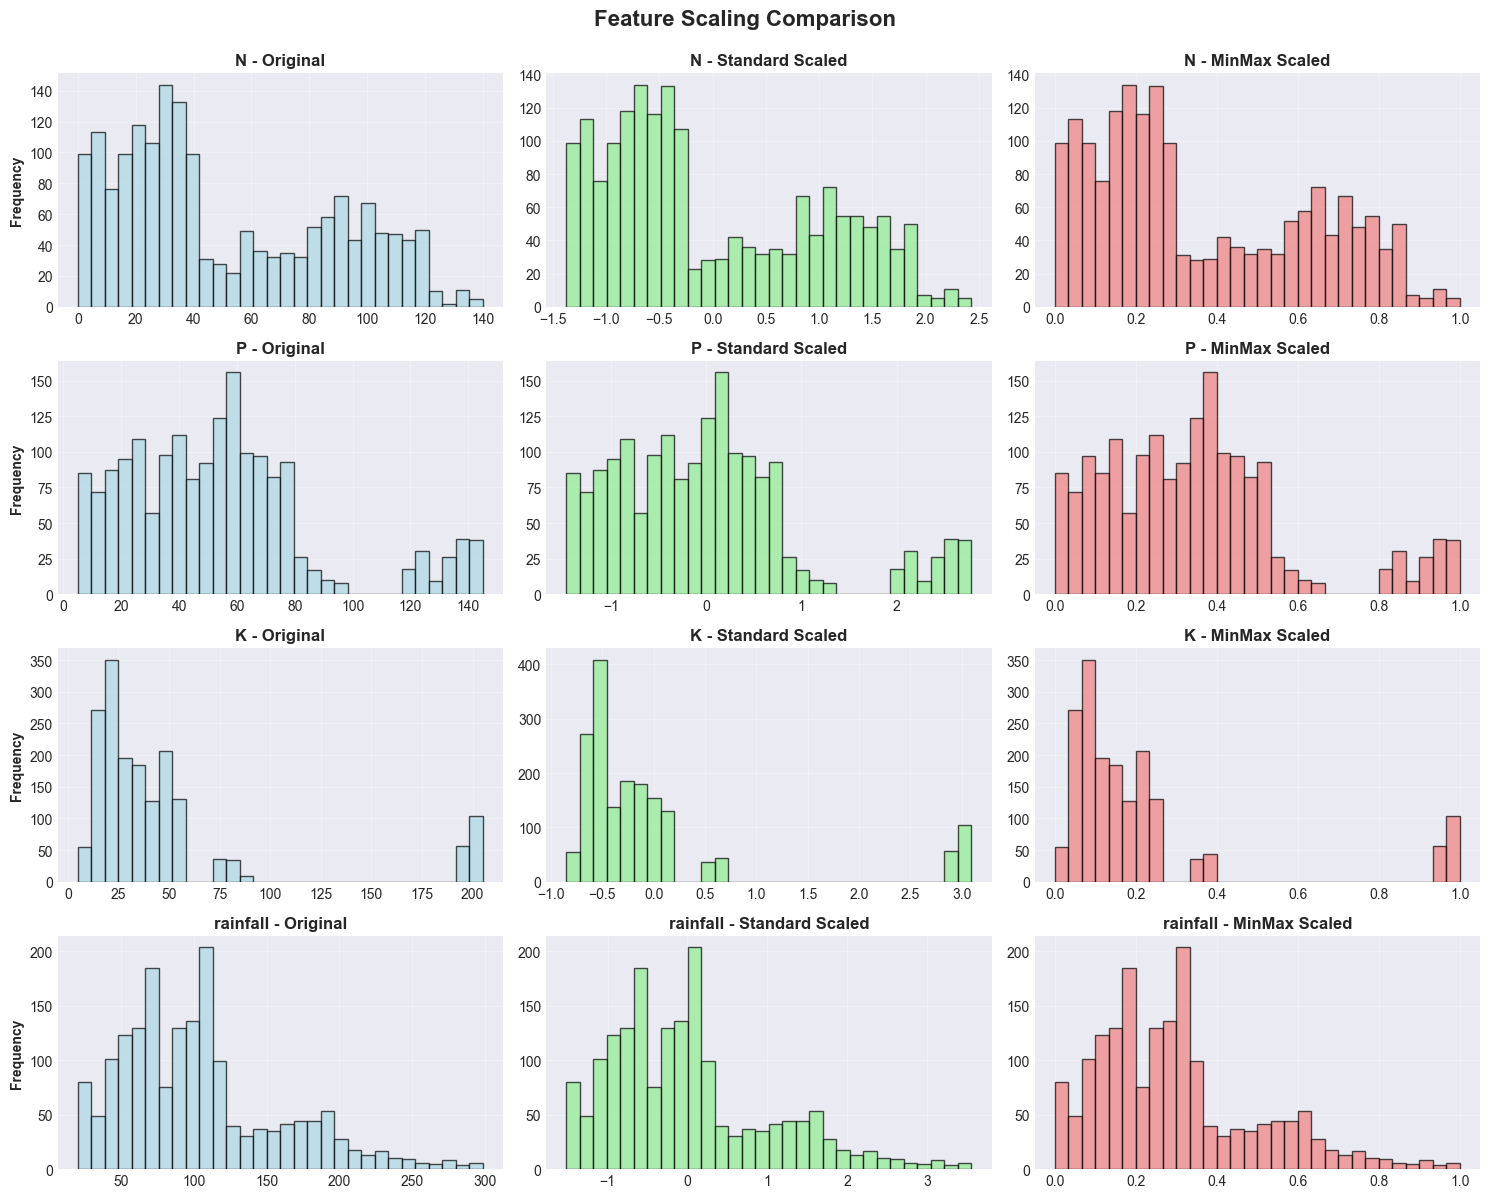

In [50]:
fig, axes = plt.subplots(len(available_features), 3, figsize=(15, 12))
fig.suptitle('Feature Scaling Comparison', fontsize=16, fontweight='bold', y=0.995)

for idx, feature in enumerate(available_features):
    # Original
    axes[idx, 0].hist(X_train[feature], bins=30, color='lightblue', edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'{feature} - Original', fontweight='bold')
    axes[idx, 0].set_ylabel('Frequency', fontweight='bold')
    axes[idx, 0].grid(True, alpha=0.3)

    # Standard scaled
    axes[idx, 1].hist(X_train_scaled_df[feature], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[idx, 1].set_title(f'{feature} - Standard Scaled', fontweight='bold')
    axes[idx, 1].grid(True, alpha=0.3)

    # MinMax scaled
    axes[idx, 2].hist(X_train_minmax_df[feature], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[idx, 2].set_title(f'{feature} - MinMax Scaled', fontweight='bold')
    axes[idx, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/visualizations/22_scaling_comparison.png', dpi=300, bbox_inches='tight')
print("\nSaved: 22_scaling_comparison.png")
plt.show()

# Save Processed Datasets

In [51]:
os.makedirs('../data/processed/ml_ready', exist_ok=True)

Save original (unscaled) splits

In [52]:
np.save('../data/processed/ml_ready/X_train.npy',X_train.values)
np.save('../data/processed/ml_ready/X_test.npy',X_test.values)
np.save('../data/processed/ml_ready/y_train.npy',y_train)
np.save('../data/processed/ml_ready/y_test.npy',y_test)

# Save Standard scaled splits

In [53]:
np.save('../data/processed/ml_ready/X_train_scaled.npy', X_train_scaled)
np.save('../data/processed/ml_ready/X_test_scaled.npy', X_test_scaled)

Save MinMax scaled splits

In [54]:
np.save('../data/processed/ml_ready/X_train_minmax.npy', X_train_minmax)
np.save('../data/processed/ml_ready/X_test_minmax.npy', X_test_minmax)

Save feature names 

In [55]:
feature_names = X_train.columns.tolist()
with open('../data/processed/ml_ready/feature_names.pkl','wb') as f:
    pickle.dump(feature_names, f)

# Data Preparation Summary Report

In [56]:
report = {
    'Metric': [
        'Original Dataset Shape',
        'Total Features',
        'Total Samples',
        'Target Classes',
        'Train Samples',
        'Test Samples',
        'Train-Test Ratio',
        'Stratification',
        'Scaling Methods',
        'Label Encoding',
        'Missing Values (Train)',
        'Missing Values (Test)',
        'Ready for ML'
    ],
    'Value': [
        f'{df.shape[0]} x {df.shape[1]}',
        X_train.shape[1],
        len(X),
        len(np.unique(y_train)),
        len(X_train),
        len(X_test),
        f'{(1-test_size)*100:.0f}% - {test_size*100:.0f}%',
        'Yes(Balanced across classes)',
        'StandardScaler, MinMaxScaler',
        f'Crops → Integers (0-{len(label_encoder.classes_)-1})',
        0,
        0,
        'YES'
    ]
}

report_df = pd.DataFrame(report)
print("\n")
print(report_df.to_string(index=False))



                Metric                        Value
Original Dataset Shape                    2200 x 40
        Total Features                           39
         Total Samples                         2200
        Target Classes                           22
         Train Samples                         1760
          Test Samples                          440
      Train-Test Ratio                    80% - 20%
        Stratification Yes(Balanced across classes)
       Scaling Methods StandardScaler, MinMaxScaler
        Label Encoding      Crops → Integers (0-21)
Missing Values (Train)                            0
 Missing Values (Test)                            0
          Ready for ML                          YES


In [57]:
report_df.to_csv('../data/processed/data_preparation_report.csv', index=False)
print("\nReport saved to: ../data/processed/data_preparation_report.csv")


Report saved to: ../data/processed/data_preparation_report.csv


# Feature Statistics Comparison

In [58]:
print("FEATURE STATISTICS: TRAIN vs TEST COMPARISON")

FEATURE STATISTICS: TRAIN vs TEST COMPARISON


Select key features for comparison

In [59]:
key_features=["N","P","K","temperature","humidity","ph","rainfall"]
available_key_features = [f for f in key_features if f in X_train.columns]

In [60]:
comparison_stats=[]
for feature in available_key_features:
    comparison_stats.append({
        'Feature': feature,
        'Train_Mean': X_train[feature].mean(),
        'Test_Mean': X_test[feature].mean(),
        'Train_Std': X_train[feature].std(),
        'Test_Std': X_test[feature].std(),
        'Mean_Diff': abs(X_train[feature].mean() - X_test[feature].mean())
    })

comparison_df=pd.DataFrame(comparison_stats)
print("\n Train vs Test Feature Statistics:")
print(comparison_df)


 Train vs Test Feature Statistics:
       Feature  Train_Mean   Test_Mean  Train_Std   Test_Std  Mean_Diff
0            N   50.547727   50.568182  36.862820  37.176730   0.020455
1            P   53.339773   53.454545  32.947620  33.175968   0.114773
2            K   48.143182   48.172727  50.708802  50.461218   0.029545
3  temperature   25.609409   25.643582   5.080371   5.002338   0.034173
4     humidity   71.416762   71.741849  22.280828  22.219012   0.325087
5           ph    6.473830    6.452079   0.783290   0.735940   0.021751
6     rainfall  103.451590  103.511917  54.992615  54.883724   0.060328


Check if distributions are similar

In [61]:
max_mean_diff=comparison_df["Mean_Diff"].max()
print("Distribution Similarity Check:")

print(f"Maximum mean difference across key features: {max_mean_diff:.4f}")

if max_mean_diff<1:
    print("Status: Excellent (Train and Test are similar)")
elif max_mean_diff<5:
    print("Status: Good (Train-Test distributions are similar)")
else:
    print("Status: Acceptable (Significant differences)")

Distribution Similarity Check:
Maximum mean difference across key features: 0.3251
Status: Excellent (Train and Test are similar)


# Visualization - Train vs Test Distribution

In [62]:
print("VISUALIZATION: TRAIN vs TEST FEATURE DISTRIBUTION")

VISUALIZATION: TRAIN vs TEST FEATURE DISTRIBUTION



Saved: 23_train_test_distribution.png


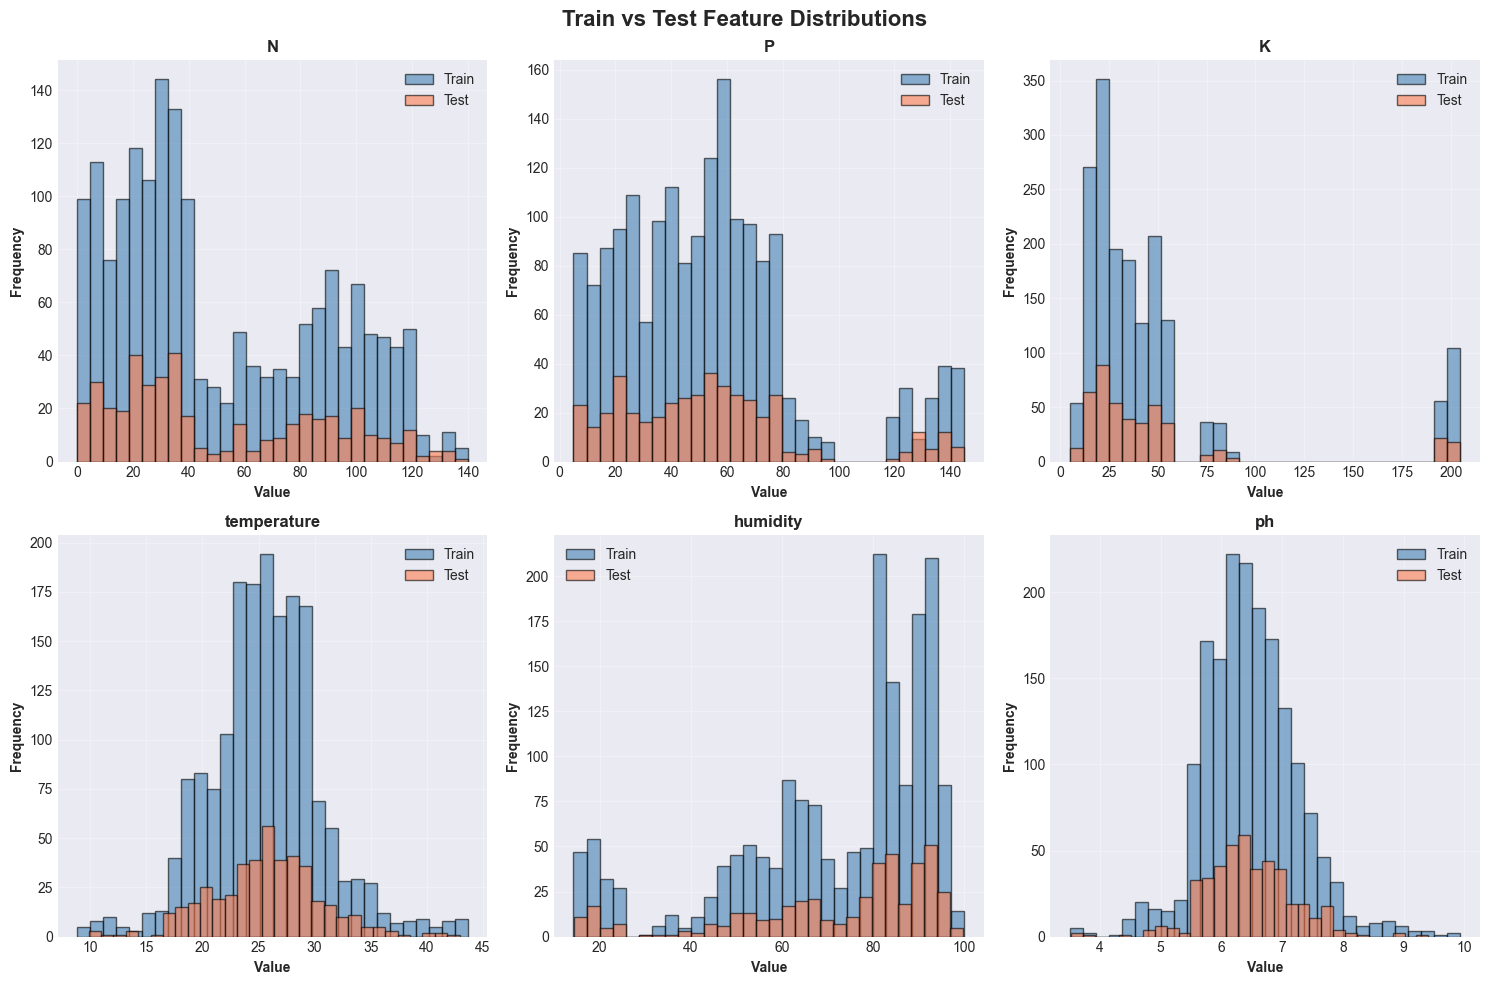

In [65]:
fig,axes=plt.subplots(2,3,figsize=(15,10))
fig.suptitle("Train vs Test Feature Distributions", fontsize=16, fontweight="bold")

plot_features=available_key_features[:6] # Plot up to 6 features

for idx,feature in enumerate(plot_features):
    row=idx//3
    col=idx%3
    
    axes[row, col].hist(X_train[feature], bins=30, alpha=0.6, label='Train',color='steelblue', edgecolor='black')
    axes[row, col].hist(X_test[feature], bins=30, alpha=0.6, label='Test',color='coral', edgecolor='black')
    
    axes[row,col].set_title(f"{feature}",fontweight="bold")
    axes[row,col].set_xlabel("Value",fontweight="bold")
    axes[row,col].set_ylabel("Frequency",fontweight="bold")
    axes[row,col].legend()
    axes[row,col].grid(True,alpha=0.3)

plt.tight_layout()
plt.savefig('../data/visualizations/23_train_test_distribution.png', dpi=300, bbox_inches='tight')
print("\nSaved: 23_train_test_distribution.png")
plt.show()